###  PIMA INDIANS DIABETES DATASET

The Pima Indian Diabetes Dataset, originally from the National Institute of Diabetes and Digestive and Kidney Diseases, contains information of 768 women from a population near Phoenix, Arizona, USA. The outcome tested was Diabetes, 258 tested positive and 500 tested negative.


	Pregnancies (number of times pregnant), 

	Oral glucose tolerance test - OGTT (two hour plasma glucose concentration after 75g anhydrous glucose in mg/dl), 

	Blood Pressure (Diastolic Blood Pressure in mmHg), 

	Skin Thickness (Triceps skin fold thickness in mm), 

	Insulin (2 h serum insulin in mu U/ml), 

	BMI (Body Mass Index in kg/m<sup>2</sup>), 

	Age (years),

	Pedigree Diabetes Function ('function that represents how likely they are to get the disease by extrapolating from their ancestor’s history')

## OBJECTIVE

Analyzing diabetic Dataset for performing descriptive, prescriptive & predictive analysis

In [1]:
#Load packages

import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.model_selection as mod
import sklearn.neighbors as nei
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, precision_recall_curve, average_precision_score 
from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import cross_val_score
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import operator
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
#Load CSV file using Pandas

pima = pd.read_csv(url)

#### Check the DataFrame & Descriptive Statistics and Analysis of Pima Indians Dataset

In [4]:
# Check dimension of the DataFrame

pima.shape

(768, 9)

In [5]:
# Check the type of 'pima'
type(pima)

pandas.core.frame.DataFrame

In [6]:
# Get row indices 

pima_row_idx = pima.index
pima_row_idx

RangeIndex(start=0, stop=768, step=1)

In [7]:
# Get the column names 

pima_col_idx = pima.columns
pima_col_idx

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
# Get data type for each attribute 

pima.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [9]:
# Check the first 5 rows

pima.head (5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
# Check missing values

pima.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
# Create Nutritional status column 

Nutritional_status = pd.Series([]) 

In [12]:
# Nutritional status based on BMI

for i in range(len(pima)): 
    if pima['BMI'][i] == 0.0: 
        Nutritional_status[i]="NA"
    
    elif pima['BMI'][i] < 18.5: 
        Nutritional_status[i]="Underweight"
        
    elif pima['BMI'][i] < 25: 
        Nutritional_status[i]="Normal"
  
    elif pima['BMI'][i] >= 25 and pima['BMI'][i] < 30: 
        Nutritional_status[i]="Overweight"
  
    elif pima['BMI'][i] >= 30: 
        Nutritional_status[i]="Obese"
        
    else: 
        Nutritional_status[i]= pima['BMI'][i] 

In [13]:
# Insert new column - Nutritional Status
pima.insert(6, "Nutritional Status", Nutritional_status)

In [14]:
# Check df containing new column
pima.head (5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Nutritional Status,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,Obese,0.627,50,1
1,1,85,66,29,0,26.6,Overweight,0.351,31,0
2,8,183,64,0,0,23.3,Normal,0.672,32,1
3,1,89,66,23,94,28.1,Overweight,0.167,21,0
4,0,137,40,35,168,43.1,Obese,2.288,33,1


In [15]:
pima['Nutritional Status'].value_counts()

Obese          472
Overweight     179
Normal         102
NA              11
Underweight      4
Name: Nutritional Status, dtype: int64

##### In this we can observe 11 women don't have information about BMI. 

In [16]:
# Create OGTT_Interpretation (Interpretation of Glucose level) column 

OGTT_Interpretation = pd.Series([]) 

In [17]:
# Interpretation of OGTT (Glucose) - using OGTT levels recommended by DIABETES UK (2019)

for i in range(len(pima)): 
    if pima['Glucose'][i] == 0.0: 
        OGTT_Interpretation [i]="NA"
    
    elif pima['Glucose'][i] <= 140: 
        OGTT_Interpretation [i]="Normal"
    
    elif pima['Glucose'][i] > 140 & pima['Glucose'][i] <= 198: 
        OGTT_Interpretation [i]="Impaired Glucose Tolerance"
        
    elif pima['Glucose'][i] > 198: 
        OGTT_Interpretation[i]="Diabetic Level"
        
    else: 
        OGTT_Interpretation [i]= pima['Glucose'][i] 

In [18]:
# Insert new column - Glucose Result
pima.insert(2, "Glucose Result", OGTT_Interpretation)

In [19]:
pima['Glucose Result'].value_counts()

Normal                        571
Impaired Glucose Tolerance    192
NA                              5
Name: Glucose Result, dtype: int64

In [20]:
Impaired_Glucose_Tolerance_Diabetic = ((pima ['Glucose'] > 140 ) & (pima ['Glucose'] <= 198) & (pima ['Outcome'] == 1)).sum()
Impaired_Glucose_Tolerance_Diabetic

131

### As it shows 131 womens , have impaired glucose tolerance 

In [21]:
Normal_Glucose_Diabetic = ((pima ['Glucose'] != 0 ) & (pima ['Glucose'] <= 140) & (pima ['Outcome'] == 1)).sum()
Normal_Glucose_Diabetic

134

In [22]:
# Create Percentile of skin thickness column

Percentile_skin_thickness = pd.Series([]) 

In [23]:
# Check how many women are 80 or older (the Percentile skin thickeness depend of skin fold and age)

pima['Age'].value_counts()

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
32    16
36    16
38    16
45    15
34    14
40    13
43    13
46    13
39    12
35    10
50     8
44     8
51     8
52     8
58     7
47     6
54     6
57     5
60     5
48     5
49     5
53     5
55     4
62     4
63     4
66     4
56     3
59     3
65     3
67     3
61     2
69     2
72     1
64     1
68     1
70     1
81     1
Name: Age, dtype: int64

In [24]:
#  Check skin fold thickness Percentile

for i in range(len(pima)): 
    
    
    if pima["Age"][i] >= 20.0 and pima["Age"][i] <= 79.0: 
        
        if pima["SkinThickness"][i] == 0.0: 
            Percentile_skin_thickness[i]=" 0 NA"
    
        elif pima["SkinThickness"][i] < 11.9: 
            Percentile_skin_thickness[i]="1 <P5th"
        
        elif pima["SkinThickness"][i] == 11.9: 
            Percentile_skin_thickness[i]="2 P5th"
        
        elif pima["SkinThickness"][i] > 11.9 and pima["SkinThickness"][i] < 14.0: 
            Percentile_skin_thickness[i]="3 P5th - P10th"
        
        elif pima["SkinThickness"][i] == 14.0: 
            Percentile_skin_thickness[i]="4 P10th"
        
        elif pima["SkinThickness"][i] > 14.0 and  pima["SkinThickness"][i] < 15.8: 
            Percentile_skin_thickness[i]="5 P10th - P15th"
        
        elif pima["SkinThickness"][i] == 15.8: 
            Percentile_skin_thickness[i]="6 P15th"
    
        elif pima["SkinThickness"][i] > 15.8 and pima["SkinThickness"][i] < 18.0: 
            Percentile_skin_thickness[i]="7 P15th - P25th"
    
        elif pima["SkinThickness"][i] == 18.0: 
            Percentile_skin_thickness[i]="8 P25th"
        
        elif pima["SkinThickness"][i] > 18.0 and pima["SkinThickness"][i] < 23.5: 
            Percentile_skin_thickness[i]="9 P25th - P50th"
   
        elif pima["SkinThickness"][i] == 23.5: 
            Percentile_skin_thickness[i]="10 P50th"
        
        elif pima["SkinThickness"][i] > 23.5 and pima["SkinThickness"][i] < 29.0: 
            Percentile_skin_thickness[i]="11 P50th - P75th"
        
        elif pima["SkinThickness"][i] == 29.0: 
            Percentile_skin_thickness[i]="12 P75th"
        
        elif pima["SkinThickness"][i] > 29.0 and pima["SkinThickness"][i] < 31.9: 
            Percentile_skin_thickness[i]="13 P75th - P85th"
        
        elif pima["SkinThickness"][i] == 31.9: 
            Percentile_skin_thickness[i]="14 P85th"
        
        elif pima["SkinThickness"][i] > 31.9 and pima["SkinThickness"][i] < 33.7: 
            Percentile_skin_thickness[i]="15 P85th - P90th"
    
        elif pima["SkinThickness"][i] == 33.7: 
            Percentile_skin_thickness[i]="16 P90th"
        
        elif pima["SkinThickness"][i] > 33.7 and pima["SkinThickness"][i] < 35.9: 
            Percentile_skin_thickness[i]="17 P90th - P95th"
    
        elif pima["SkinThickness"][i] == 35.9: 
            Percentile_skin_thickness[i]="18 P95th"
        
        elif pima["SkinThickness"][i] > 35.9: 
            Percentile_skin_thickness[i]="19 >P95th"
            
    elif pima["Age"][i] >= 80.0:  #Only 1 woman is 81 years old
        if  pima["SkinThickness"][i] > 31.7: 
            Percentile_skin_thickness[i]="20 >P95th"


In [25]:
# Insert new column - Percentile of skin thickness

pima.insert(4, "Percentile skin thickness", Percentile_skin_thickness)

In [28]:
diabetic_malnourished_st = ((pima ['SkinThickness'] < 15.8) & (pima ['Outcome'] == 1)).sum()
diabetic_malnourished_st

94

In [29]:
diabetic_malnourished_bmi = ((pima ['BMI'] < 18.5) & (pima ['Outcome'] == 1)).sum()
diabetic_malnourished_bmi

2

In [30]:
diabetic_malnourished_bmi_st = ((pima ['BMI'] < 18.5) & (pima ['SkinThickness'] < 15.8) & (pima ['Outcome'] == 1)).sum()
diabetic_malnourished_bmi_st

2

##### By considering only skin thickness we found 94 women were classified as underweight or malnourished. but only 2 diabetic women presented underweight/malnutrition when considering BMI or BMI & Skin Thickness. Skinfold thicknesses are difficult measurements as skinfold thickness can vary with diseases such as diabetes, menopause, and hydrational status. Hence, more data should be included in this dataset to help to identify malnutrition using skinfold thickness measurement.

In [31]:
# Minimum

In [32]:
pima.min()

Pregnancies                                           0
Glucose                                               0
Glucose Result               Impaired Glucose Tolerance
BloodPressure                                         0
Percentile skin thickness                          0 NA
SkinThickness                                         0
Insulin                                               0
BMI                                                   0
Nutritional Status                                   NA
DiabetesPedigreeFunction                          0.078
Age                                                  21
Outcome                                               0
dtype: object

In [33]:
# Maximum

In [34]:
pima.max()

Pregnancies                               17
Glucose                                  199
Glucose Result                        Normal
BloodPressure                            122
Percentile skin thickness    9 P25th - P50th
SkinThickness                             99
Insulin                                  846
BMI                                     67.1
Nutritional Status               Underweight
DiabetesPedigreeFunction                2.42
Age                                       81
Outcome                                    1
dtype: object

In [35]:
#Check if the sample were classified as Underweight presented a BMI lower than 18.5

pima_underweight = pima[pima['Nutritional Status'] =='Underweight']
pima_underweight

,Pregnancies,Glucose,Glucose Result,BloodPressure,Percentile skin thickness,SkinThickness,Insulin,BMI,Nutritional Status,DiabetesPedigreeFunction,Age,Outcome
239,0,104,Normal,76,0 NA,0,0,18.4,Underweight,0.582,27,0
418,1,83,Normal,68,0 NA,0,0,18.2,Underweight,0.624,27,0
438,1,97,Normal,70,5 P10th - P15th,15,0,18.2,Underweight,0.147,21,0
526,1,97,Normal,64,9 P25th - P50th,19,82,18.2,Underweight,0.299,21,0


In [36]:
pima['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

##### 500 not diabetic and 268 are diabetic 

In [37]:
# Another way of counting the outcome (diabetes)
count_not_diabetic = len(pima[pima['Outcome']==0])
count_not_diabetic

500

In [39]:
pima.mean()

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

In [45]:
# Check minimum and maximum values of glucose from women that don't have zero value of glucose

In [46]:
pima_glucose['Glucose'].min()

44

In [47]:
pima_glucose['Glucose'].max()

199

In [50]:
# Check the average of blood pressure (only from women that don't have zero value of Blood Pressure)

pima_BloodPressure['BloodPressure'].mean()

72.40518417462484

In [51]:
# Minimum and maximum of Blood Pressure from women that don't have zero value of Blood Pressure

In [52]:
pima_BloodPressure['BloodPressure'].min()

24

In [53]:
pima_BloodPressure['BloodPressure'].max()

122

In [56]:
# Check average value of insulin from women that don't have zero value of insulin

pima_insulin['Insulin'].mean()

155.5482233502538

In [57]:
# Check minimum and maximum of Insulin value from women that don't have zero value of insulin

In [58]:
pima_insulin['Insulin'].min()

14

In [59]:
pima_insulin['Insulin'].max()

846

In [62]:
# Check average of BMI from women that don't have zero value of BMI

pima_BMI['BMI'].mean()

32.45746367239099

In [63]:
# Check minimun and maximum value of BMI from women that don't have zero value of BMI

In [64]:
pima_BMI['BMI'].min()

18.199999999999999

In [65]:
pima_BMI['BMI'].max()

67.099999999999994

In [68]:
pima_all['Outcome'].value_counts()

0    262
1    130
Name: Outcome, dtype: int64

##### 262 women don't have DM(Diabetes Mellitious) and 130 have DM.

### Attributes Distribution

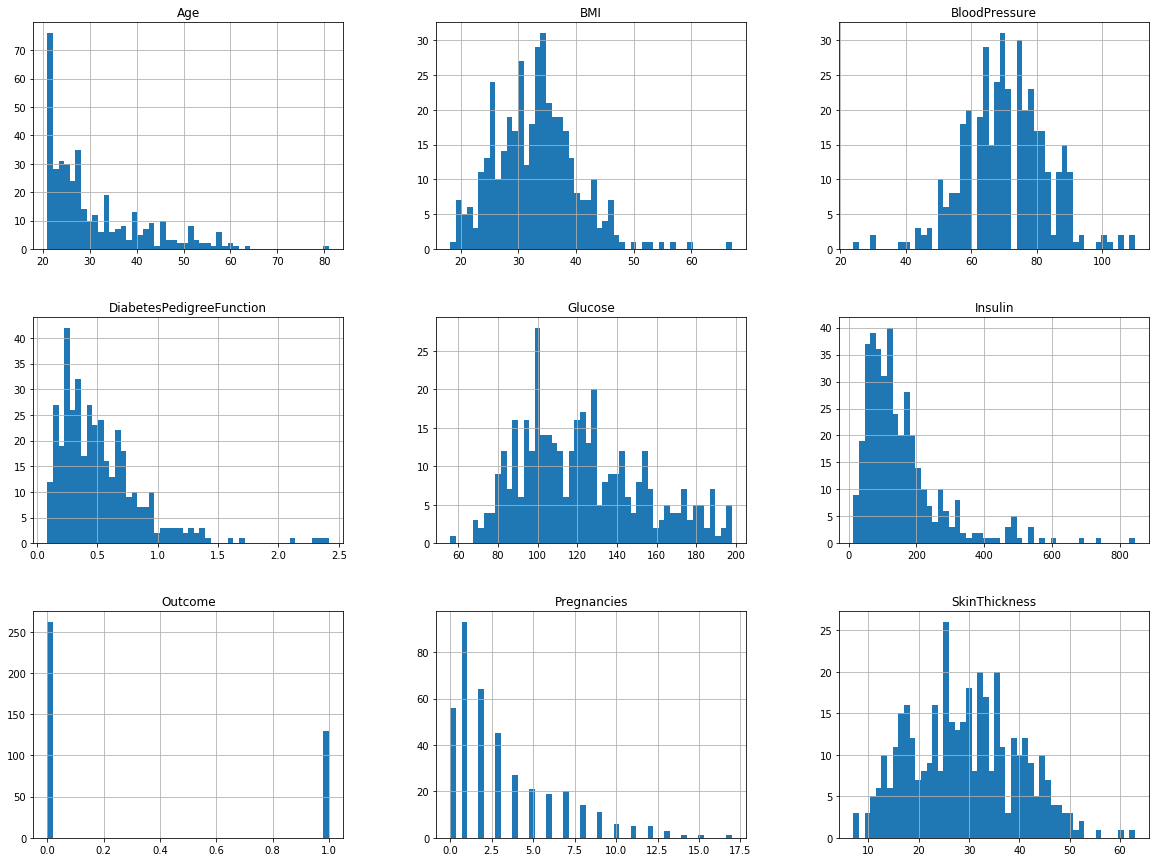

In [75]:
# Histogram
pima_all.hist(bins=50, figsize=(20, 15))
plt.show()

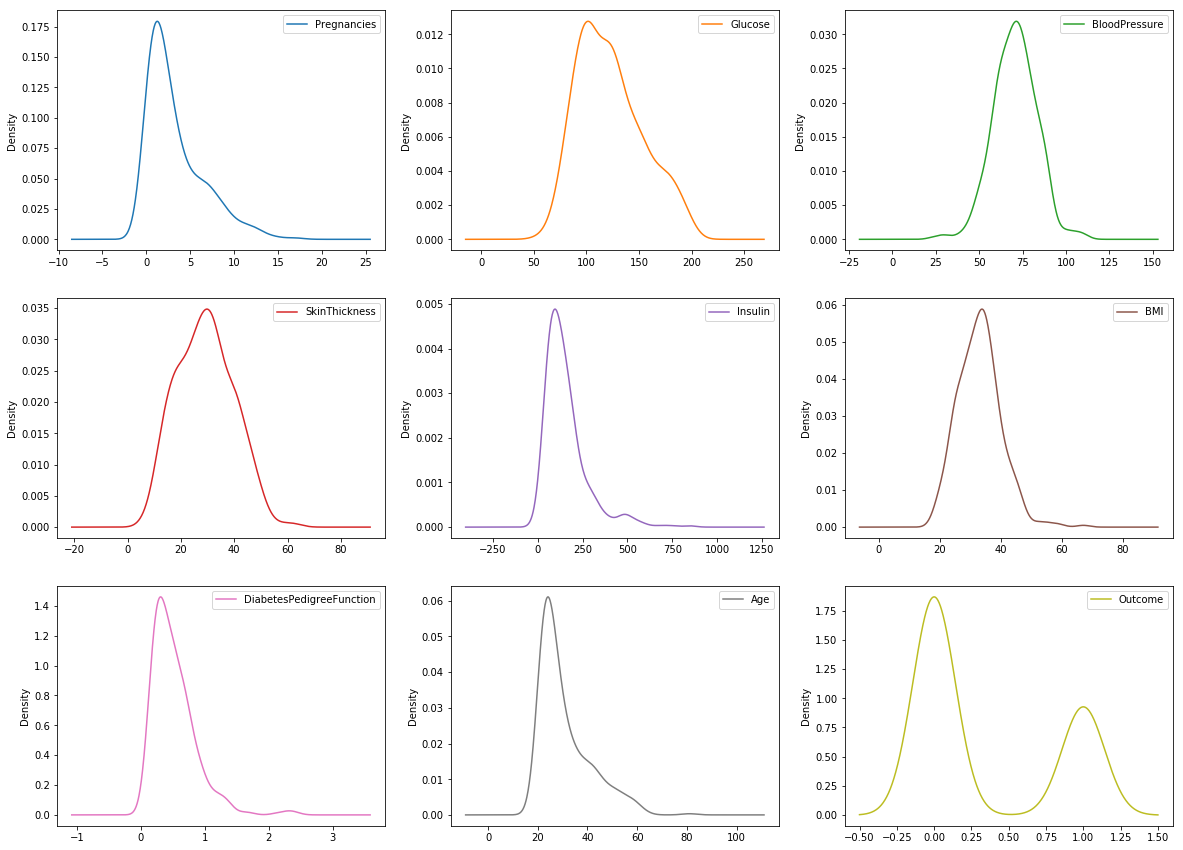

In [76]:
# Density plots for all attributes to visualize the distribution of each attribute
pima_all.plot(kind='density', subplots=True, layout=(3,3), figsize=(20, 15), sharex=False)
plt.show()

Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

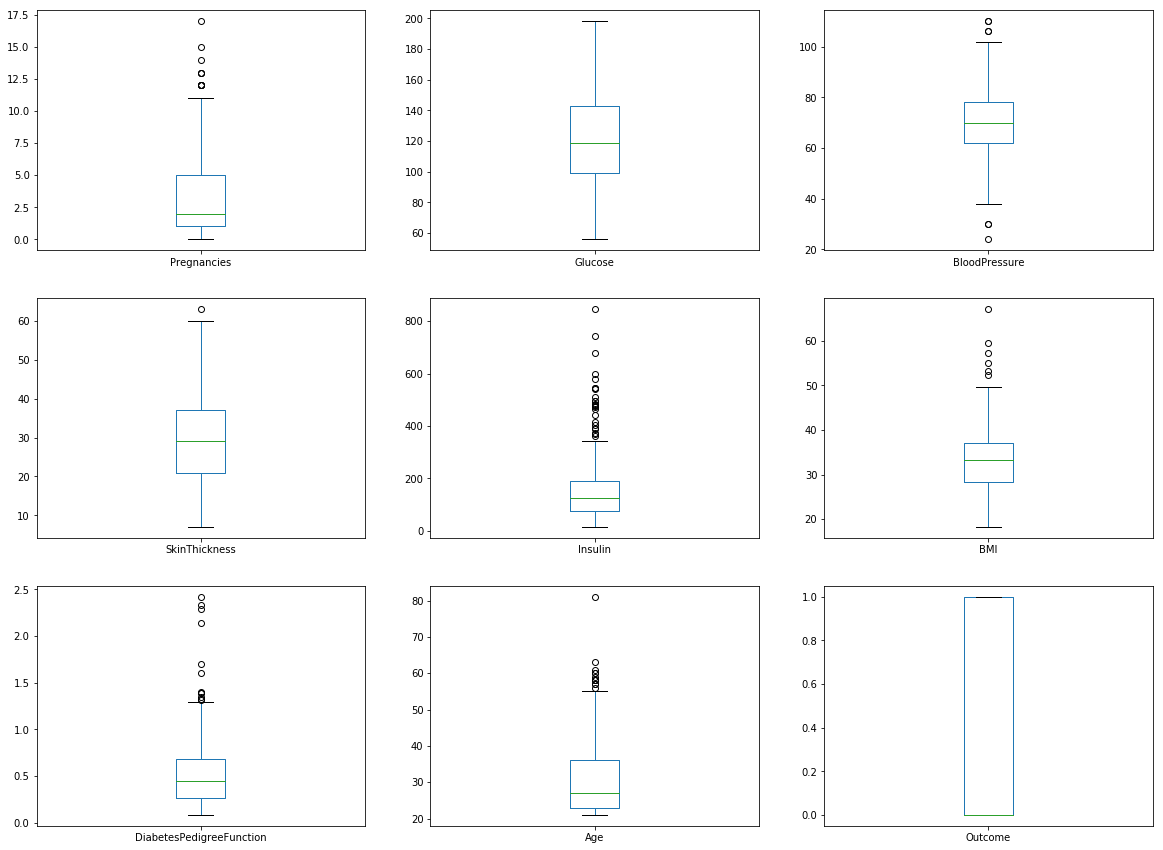

In [77]:
#Box and Whisker plot to visualize the distribution of all atributes
pima_all.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20,15))

In [78]:
#Skew of attributes distributions
skew=pima_all.skew(axis = 1)

##### Bell shape curve: Blood Pressure
##### Right-Skewed: Age, Insulin, Pregnancies,  Diabetes Pedigree Function

##### Short IQR: insulin, Diabetes Pedigree Function, Blood Pressure and BMI
##### At least 75% of the women:
+ are 25 years old or older
+ have BMI nearly 30 kg/m2
+ have insulin level 100 or more
+ have 1 or more pregnancies
+ have glucose level of 100 mg/dL or more
+ have blood pressure of 60 mmHg or more 

## Correlation

In [79]:
# Correlation between the different characteristics. Closer to 1 better is the correlation.

corr_matrix_pearson = pima_all.corr(method='pearson')
corr_matrix_pearson

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.198291,0.213355,0.093209,0.078984,-0.025347,0.007562,0.679608,0.256566
Glucose,0.198291,1.000000,0.210027,0.198856,0.581223,0.209516,0.140180,0.343641,0.515703
BloodPressure,0.213355,0.210027,1.000000,0.232571,0.098512,0.304403,-0.015971,0.300039,0.192673
SkinThickness,0.093209,0.198856,0.232571,1.000000,0.182199,0.664355,0.160499,0.167761,0.255936
Insulin,0.078984,0.581223,0.098512,0.182199,1.000000,0.226397,0.135906,0.217082,0.301429
BMI,-0.025347,0.209516,0.304403,0.664355,0.226397,1.000000,0.158771,0.069814,0.270118
DiabetesPedigreeFunction,0.007562,0.140180,-0.015971,0.160499,0.135906,0.158771,1.000000,0.085029,0.209330
Age,0.679608,0.343641,0.300039,0.167761,0.217082,0.069814,0.085029,1.000000,0.350804
Outcome,0.256566,0.515703,0.192673,0.255936,0.301429,0.270118,0.209330,0.350804,1.000000


#### There are no strong correlation between the features. The 'strongest' ones are the :
+ Age x pregnancies (0.68) - Older women tend to have higher number of pregnancies
+ Glucose x insulin (0.58)
+ Glucose x outcome (0.52) - Women that have higher level of glucose tend to have higher level of insulin and have DM 
+ Skin fold thickness x BMI (0.66)  - Women with higher skin fold thickness value have higher BMI (and probably are overweight/obese)

##### Negative correlation:
+ BMI x Pregnancies (-0.025)
+ Blood Pressure x Diabetes Pedigree Function (-0.016)

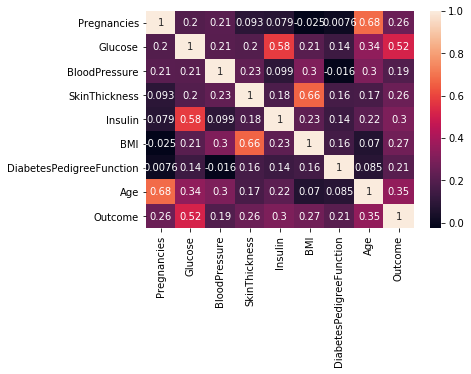

In [80]:
sns.heatmap(corr_matrix_pearson, annot = True)

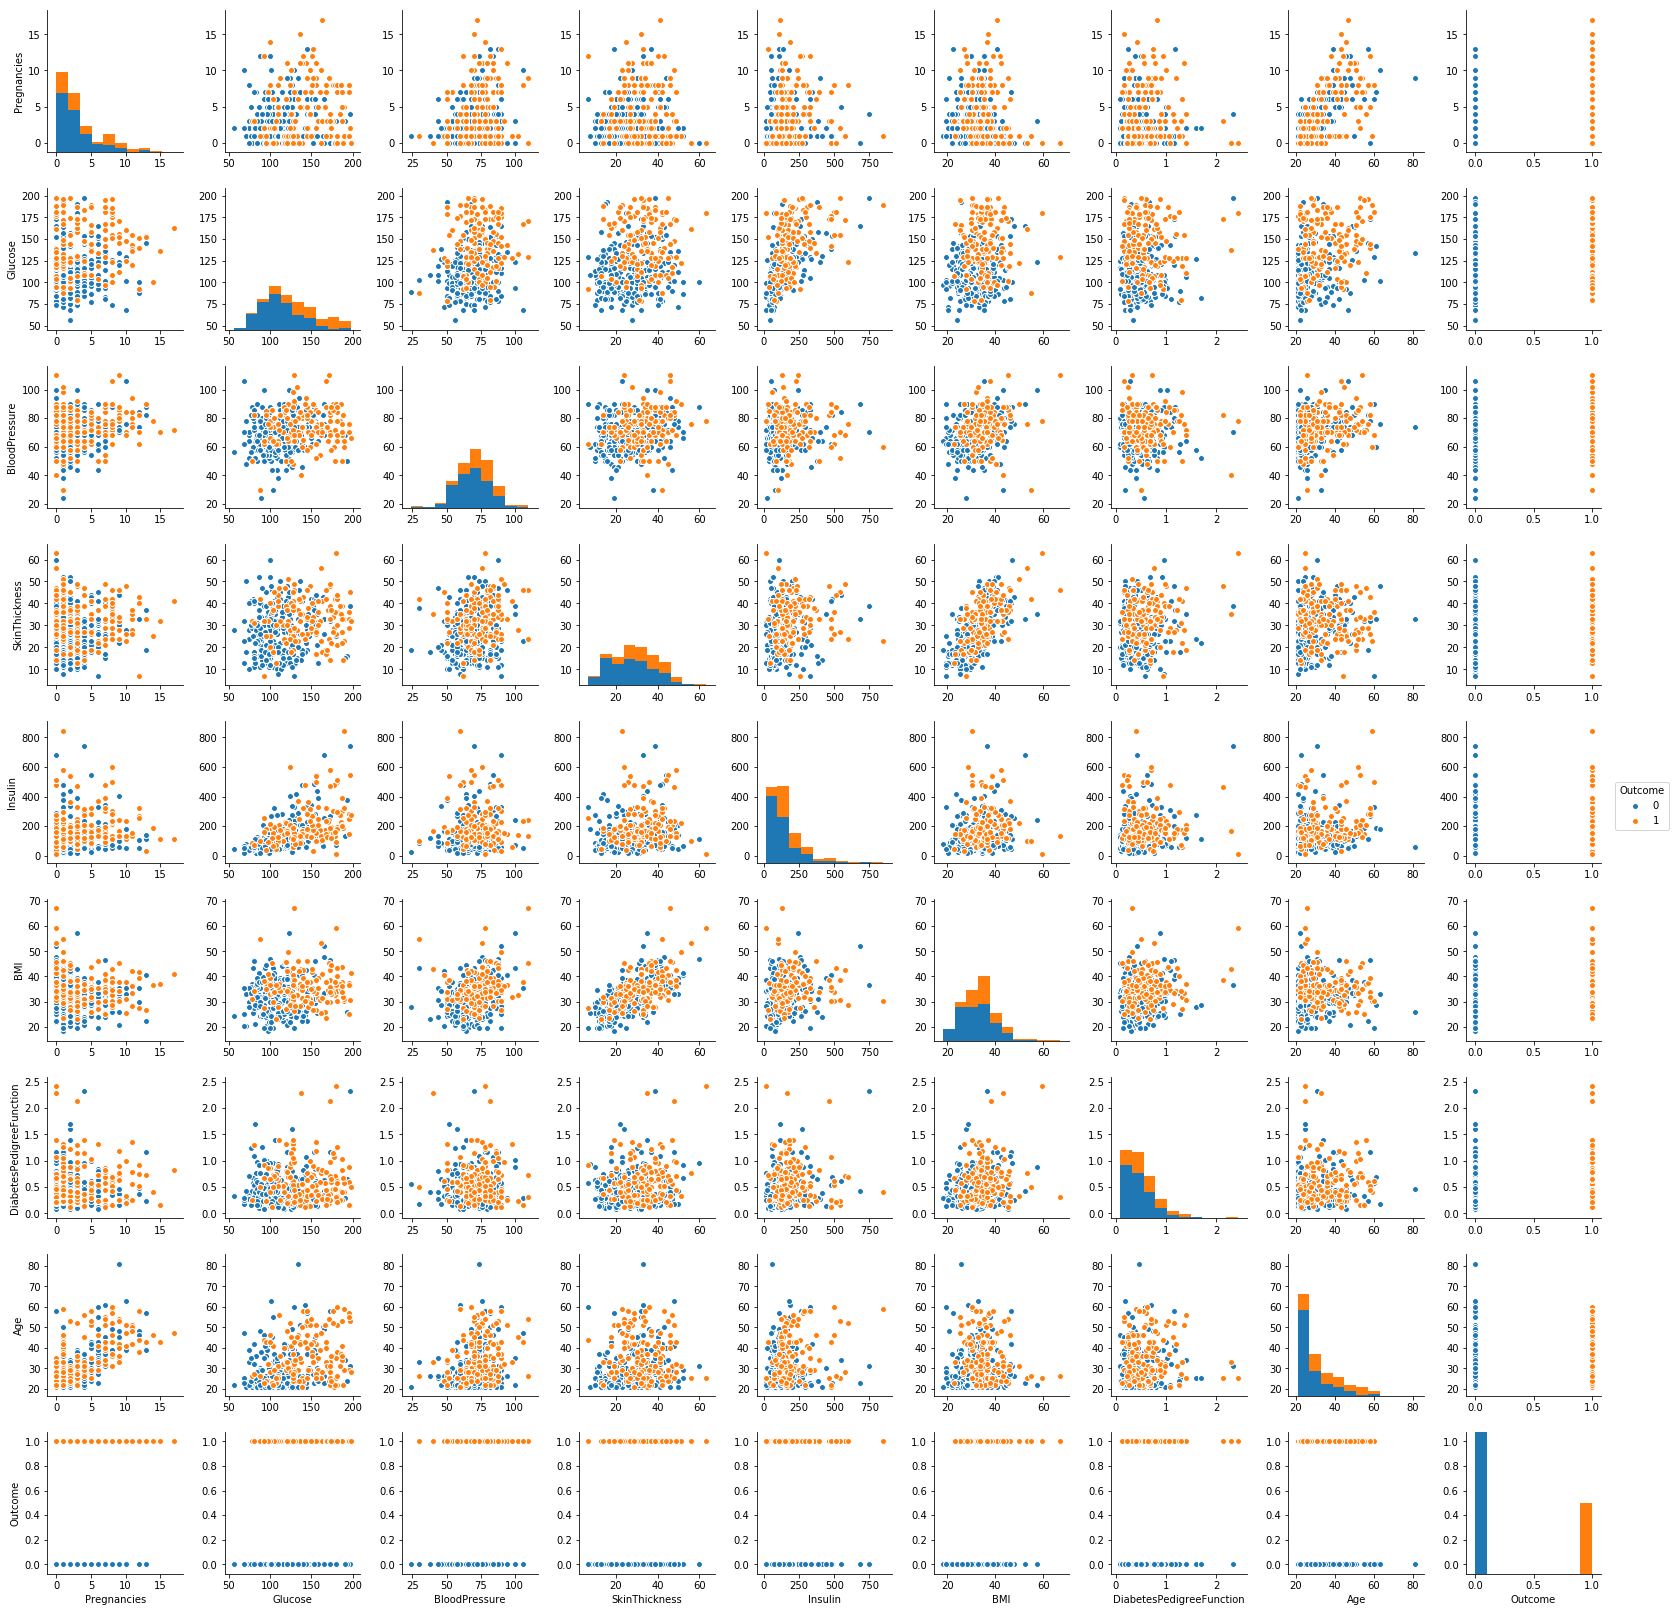

In [81]:
# Pairplot

sns.pairplot(pima_all, hue='Outcome')

##### Diabetic women tend to show larger values of age, BMI, insulin, skin thickness, blood pressure, and pregnancies.
##### The feature that it is possible to see 2 distinct groups (diabetic and non diabetic) is glucose.

## Logic Regression

In [82]:
#1st Iteration - 8 variables
var1=["Pregnancies", "Glucose","BloodPressure","SkinThickness","Insulin", "BMI","DiabetesPedigreeFunction", "Age"]
X=pima_all[var1]
y=pima_all.Outcome

In [83]:
## Defining the model and assigning Y (Dependent) and X (Independent Variables)
logit_model=sm.Logit(y,X)

## Fitting the model and publishing the results
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.563677
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Mon, 14 Dec 2020   Pseudo R-squ.:                  0.1128
Time:                        16:22:42   Log-Likelihood:                -220.96
converged:                       True   LL-Null:                       -249.05
                                        LLR p-value:                 8.717e-10
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1299      0.049      2.655      0.008       0.034

##### This model can explain 56% of the variation in dependent variable. SkinThickness, BMI, Diabetes Pedigree Function, Age, and Insulin are attributes to be eliminated in the next model. as variables that influence the outcome should have a p-value less than 0.05. 

In [84]:
#2nd Iteration - 3 variables
var2=["Pregnancies", "Glucose","BloodPressure"]
X=pima_all[var2]
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.574607
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  392
Model:                          Logit   Df Residuals:                      389
Method:                           MLE   Df Model:                            2
Date:                Mon, 14 Dec 2020   Pseudo R-squ.:                 0.09558
Time:                        16:22:42   Log-Likelihood:                -225.25
converged:                       True   LL-Null:                       -249.05
                                        LLR p-value:                 4.597e-11
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Pregnancies       0.1405      0.037      3.826      0.000       0.069       0.212
Glucose           0.

##### This model can explain 57% of the variation in dependent variable. All the variables show a p-value < 0.005.

In [85]:
logreg = LogisticRegression()
var2=["Pregnancies", "Glucose","BloodPressure"]
X=pima_all[var2]
y=pima_all.Outcome
logreg.fit(X,y)

## Defining the y_pred variable for the predicting values. 
y_pred=logreg.predict(X)

## Calculating the precision of the model
print(classification_report(y,y_pred))

             precision    recall  f1-score   support

          0       0.79      0.89      0.84       262
          1       0.71      0.53      0.61       130

avg / total       0.77      0.77      0.76       392



##### The model precision of model #2 (3 variables) is 77%.

In [86]:
## Confusion matrix gives the number of cases that the model is able to accurately predict the outcomes, and the number of cases the model gives false positive and false negatives
confusion_matrix = confusion_matrix(y, y_pred)
print(confusion_matrix)

[[234  28]
 [ 61  69]]


##### The confusion matrix shows that 234 + 69 are correct predictions and 61 + 28 are incorrect predictions.

## Classifier

In [87]:
# Predict the outcome - knn

inputs = pima_all[['Glucose', 'Insulin', 'SkinThickness', 'BMI', 'Age']]

In [88]:
outputs = pima_all['Outcome']

In [89]:
knn = nei.KNeighborsClassifier(n_neighbors=5)

In [90]:
knn.fit(inputs, outputs)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [91]:
# Evaluate knn

(knn.predict(inputs) == outputs).sum()

322

##### From 392, 322 got correct outcome predicted.

In [92]:
#Split the train set - 1/3 is to test

inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs,outputs, test_size =0.33)

In [93]:
knn = nei.KNeighborsClassifier(n_neighbors=5)
knn.fit(inputs_train, outputs_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [94]:
(knn.predict(inputs_test) == outputs_test).sum()

99

In [95]:
#Count how many women are Positive (1) and Negative (0) for diabetes in the test set 

outputs_test.value_counts()

0    94
1    36
Name: Outcome, dtype: int64

## Check classification accuracy with knn = 5

In [96]:
outputs_pred = knn.predict(inputs_test)
accuracy = metrics.accuracy_score(outputs_test, outputs_pred)
accuracy

0.7615384615384615

In [97]:
# 10-fold cross-validation with knn = 5

scores = cross_val_score (knn, inputs, outputs, cv =10, scoring = 'accuracy')
scores

array([ 0.725     ,  0.8       ,  0.64102564,  0.61538462,  0.64102564,
        0.74358974,  0.66666667,  0.82051282,  0.76923077,  0.79487179])

In [98]:
scores.mean()

0.72173076923076918

## Optimal value of k

In [99]:
k_range = range(1,41)
k_scores = []

In [100]:
for k in k_range:
    knn = nei.KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score (knn, inputs, outputs, cv = 10, scoring = 'accuracy')
    k_scores.append(scores.mean())

In [101]:
k_scores

[0.72224358974358971,
 0.73967948717948717,
 0.72974358974358966,
 0.73698717948717951,
 0.72173076923076918,
 0.73961538461538456,
 0.75224358974358974,
 0.75237179487179484,
 0.74993589743589739,
 0.76256410256410256,
 0.77025641025641023,
 0.76256410256410256,
 0.76525641025641022,
 0.75743589743589745,
 0.74737179487179484,
 0.74724358974358973,
 0.75749999999999995,
 0.7549358974358974,
 0.75237179487179495,
 0.75756410256410256,
 0.755,
 0.74980769230769229,
 0.74724358974358973,
 0.7548717948717949,
 0.74724358974358984,
 0.74974358974358979,
 0.74717948717948723,
 0.75230769230769234,
 0.74717948717948723,
 0.75230769230769234,
 0.7548717948717949,
 0.75743589743589745,
 0.7548717948717949,
 0.75237179487179484,
 0.75743589743589745,
 0.75743589743589745,
 0.76762820512820507,
 0.76256410256410256,
 0.76000000000000001,
 0.7599358974358974]

Text(0,0.5,'Cross-validation accuracy')

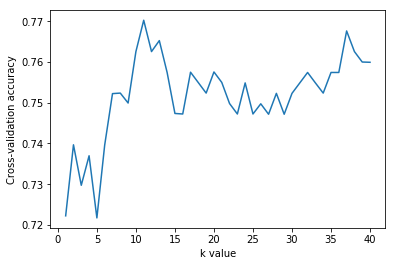

In [102]:
#Visualise best k number

plt.plot(k_range, k_scores)
plt.xlabel ('k value')
plt.ylabel('Cross-validation accuracy')

In [103]:
# Optimal value for k is 10

knn = nei.KNeighborsClassifier(n_neighbors=10)
knn.fit(inputs_train, outputs_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [104]:
(knn.predict(inputs_test) == outputs_test).sum()

103

In [105]:
outputs_pred = knn.predict(inputs_test)
accuracy = metrics.accuracy_score(outputs_test, outputs_pred)
accuracy #76.1%

0.79230769230769227

In [106]:
# 10-fold cross-validation with knn = 3

scores = cross_val_score (knn, inputs, outputs, cv =10, scoring = 'accuracy')
scores #accuracy scores arrays (from 61.5% to 84.6%)

array([ 0.8       ,  0.8       ,  0.69230769,  0.61538462,  0.69230769,
        0.84615385,  0.71794872,  0.87179487,  0.79487179,  0.79487179])

In [107]:
# Average accuracy score

scores.mean()

0.76256410256410256

### Confusion Matrix

In [132]:
conf_mtx_nb = metrics.confusion_matrix(outputs_test, out_pred)
conf_mtx_nb

array([[65, 21],
       [35,  9]], dtype=int64)

In [133]:
conf_mtx_new_features = metrics.confusion_matrix(outputs_test, outputs_pred_new_inputs)
conf_mtx_new_features

array([[68, 18],
       [19, 25]], dtype=int64)

##### In reality, 46 women in the sample have Diabetes mellitious, and 84 women do not.
 

## CONCLUSION

### Our analysis will help people to get the diabetic knowledge and also early detection of diabetes can be done. It will also save patient’s money and time. In our research, we can include or make a website for our user/patient in which they can input their data and get to know about their diabetes status whether they are having diabetes or not. They can also get to know whether there are any chances in future to have diabetes or not. If there are any chances of having diabetes in future, they can also be provided the suggestions and instructions for how to prevent it.  


## REFERENCE

1. TYNECKI P. Predict diabetes diagnosis for Pima Female Indians with Logistic Regression. 2018. Available on: https://www.kaggle.com/ptynecki/pima-indians-diabetes-prediction-with-lr-84.
2. SCHULZ LO, CHAUDHARI LS. High-Risk Populations: The Pimas of Arizona and Mexico
Curr Obes Rep. 2015 Mar 1; 4(1): 92–98. Available on: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4418458/
3. RUIZ-ALEJOS A, CARRILLO-LARCO RM, MIRANDA JJ, GILMAN RH, SMEETH L, BERNABE-Ortiz A. Skinfold thickness and the incidence of type 2 diabetes mellitus and hypertension: an analysis of the PERU MIGRANT study. Public Health Nutr. 2020;23(1):63-71. doi:10.1017/S1368980019001307
4. FRYAR CD, GU Q, OGDEN CL. Anthropometric reference data for children and adults: United States, 2007–2010. National Center for Health Statistics. Vital Health Stat 11(252). 2012.
5. VAN GAAL L., SCHEEN A. Weight Management in Type 2 Diabetes: Current and Emerging Approaches to Treatment, Diabetes Care 2015; 38(6): 1161 - 1172. Available on http://care.diabetesjournals.org/content/38/6/1161.
6. WILDING JPH. The importance of weight management in type 2 diabetes mellitus. Int J Clin Pract. 2014 Jun; 68(6): 682–691. Available on: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4238418/
7. KODESH I. Associations between Variables Regarding Diabetes for Pima Indian Women. Available on: https://rpubs.com/ikodesh/53189.
8. DIABETES UK. Oral Glucose Tolerance Test. 2019. Available on: https://www.diabetes.co.uk/oral-glucose-tolerance-test.html
9. NATIONAL INSTITUTE FOR HEALTH AND CARE EXCELLENCE - NICE. Guideline Hypertension in adults: diagnosis and management. 2019. Available on: https://www.nice.org.uk/guidance/ng136/documents/draft-guideline
10. BOER IH, BANGALORE S, BENETOS A, DAVIS AM, MICHOS ED, MUNTNER P, ROSSING P, ZOUNGAS S, BAKRIS G. Diabetes and Hypertension: A Position Statement by the American Diabetes Association. Diabetes Care 2017 Sep; 40(9): 1273-1284.
11. BLOOD PRESSURE UK. Low Blood Pressure. Available on:  http://www.bloodpressureuk.org/microsites/u40/Home/facts/Whatislow#:~:text=For%20instance%2C%20when%20the%20heart,between%2040%20to%20160%20mmHg.
12. CHANDRA-SELVI E, PAVITHRA N, SAIKUMAR P. Skin Fold Thickness in Diabetes Mellitus: A Simple Anthropometric Measurement May Bare the Different Aspects of Adipose Tissue. IOSR Journal of Dental and Medical Sciences (IOSR-JDMS) e-ISSN: 2279-0853, p-ISSN: 2279-0861.Volume 15, Issue 11 Ver. IX (November. 2016), PP 07-11.
13. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4287763/
14. https://www.sciencedirect.com/science/article/pii/S1646343913000734
15. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3417105/

# END